<a href="https://colab.research.google.com/github/Devx228/demo/blob/main/finaldev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install seaborn --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 63.1 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.47.1
    Uninstalling transformers-4.47.1:
      Successfully uninstalled transformers-4.47.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.6/336.6 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.2.1
    Uninstalling accelerate-1.2.1:
      Successfully uninstalled accelerate-1.2.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.2 MB/s eta 0:00:00
  Attempting

In [2]:
from datasets import load_dataset

dataset = load_dataset("imdb")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [4]:
import pandas as pd
df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])

In [5]:
df.head()

,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0


<Axes: title={'center': 'Words per Review'}, xlabel='label'>

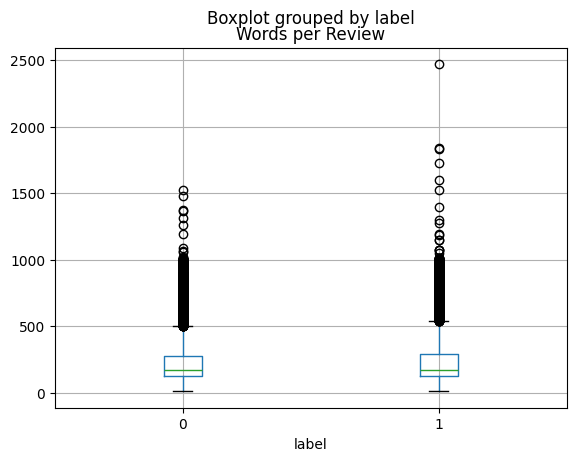

In [6]:
df['Words per Review'] = df['text'].str.split().apply(len)
df.boxplot("Words per Review", by="label")

In [7]:
from transformers import AutoTokenizer
model_ckpt = "bert-base-uncased"  #ENGLISH english
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

text = "We love to sleep! Winters are awesome!"
encoded_text = tokenizer(text)
print(encoded_text)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

{'input_ids': [101, 2057, 2293, 2000, 3637, 999, 12214, 2024, 12476, 999, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [8]:
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, stratify=df['label'])
test, validation = train_test_split(test, test_size=1/3, stratify=test['label'])

dataset = DatasetDict({
    "train": Dataset.from_pandas(train, preserve_index=False),
    "test": Dataset.from_pandas(test, preserve_index=False),
    "validation": Dataset.from_pandas(validation, preserve_index=False)
})
train.shape, test.shape, validation.shape

((20000, 3), (3333, 3), (1667, 3))

In [9]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'Words per Review'],
        num_rows: 20000
    })
    test: Dataset({
        features: ['text', 'label', 'Words per Review'],
        num_rows: 3333
    })
    validation: Dataset({
        features: ['text', 'label', 'Words per Review'],
        num_rows: 1667
    })
})

In [10]:
def tokenize(batch):
    temp= tokenizer(batch['text'], padding=True, truncation=True, return_token_type_ids=True,)
    return temp
emotion_encoded=dataset.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3333 [00:00<?, ? examples/s]

Map:   0%|          | 0/1667 [00:00<?, ? examples/s]

In [11]:
from transformers import AutoModel
import torch
model= AutoModel.from_pretrained(model_ckpt)
model

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [12]:
from transformers import AutoModelForSequenceClassification, AutoConfig
import torch

# Number of labels (binary classification: 0 and 1)
num_labels = 2  # For binary classification, this should always be 2

# Check if CUDA is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model checkpoint (replace with your desired pre-trained model)
model_ckpt = "bert-base-uncased"  # Example checkpoint

# Create label mappings
label2id = {"negative": 0, "positive": 1}
id2label = {v: k for k, v in label2id.items()}

# Load the configuration with the specified label mappings and number of labels
config = AutoConfig.from_pretrained(
    model_ckpt,
    num_labels=num_labels,
    label2id=label2id,
    id2label=id2label
)

# Load the model with the custom configuration
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device)

# Print model summary
print(model)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [16]:
from transformers import TrainingArguments
from sklearn.metrics import f1_score, accuracy_score
batch_size=32
training_dir = "bert_base_training_dir"
training_args= TrainingArguments(output_dir = training_dir,
              overwrite_output_dir = True,
              num_train_epochs = 2,
              learning_rate = 2e-5,
              per_device_train_batch_size = batch_size,
              per_device_eval_batch_size = batch_size,
              weight_decay = 0.01,
              evaluation_strategy = 'epoch',
              disable_tqdm = False
    )
!pip install evaluate
def compute_metrics (pred) :
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

from transformers import Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=emotion_encoded['train'],
    eval_dataset=emotion_encoded['validation'],
    compute_metrics=compute_metrics,
    tokenizer=tokenizer
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


<ipython-input-16-847722a7c587>:24: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [14]:
device

device(type='cuda')

In [17]:
trainer.train()

Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.097800,0.208207,0.938212,0.938209
2,0.094100,0.266409,0.935813,0.935813


TrainOutput(global_step=1250, training_loss=0.0922586410522461, metrics={'train_runtime': 3809.0671, 'train_samples_per_second': 10.501, 'train_steps_per_second': 0.328, 'total_flos': 1.05244422144e+16, 'train_loss': 0.0922586410522461, 'epoch': 2.0})

In [18]:
device

device(type='cuda')

In [20]:
preds_output = trainer.predict(emotion_encoded[ 'test'])
preds_output.metrics

{'test_loss': 0.27584511041641235,
 'test_accuracy': 0.9351935193519352,
 'test_f1': 0.9351927492885541,
 'test_runtime': 103.2538,
 'test_samples_per_second': 32.28,
 'test_steps_per_second': 1.017}

In [21]:
preds_output.predictions

array([[ 3.316175  , -3.5709493 ],
       [ 2.6890707 , -3.1819403 ],
       [ 3.749938  , -3.7499716 ],
       ...,
       [-3.8555458 ,  3.4384966 ],
       [-1.0982906 ,  0.88956964],
       [-2.8344321 ,  2.3633301 ]], dtype=float32)

In [24]:
import numpy as np
y_pred = np.argmax(preds_output.predictions, axis=1)
y_true = emotion_encoded['test'][:]['label']

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1666
           1       0.94      0.93      0.93      1667

    accuracy                           0.94      3333
   macro avg       0.94      0.94      0.94      3333
weighted avg       0.94      0.94      0.94      3333



In [26]:
label2id

{'negative': 0, 'positive': 1}

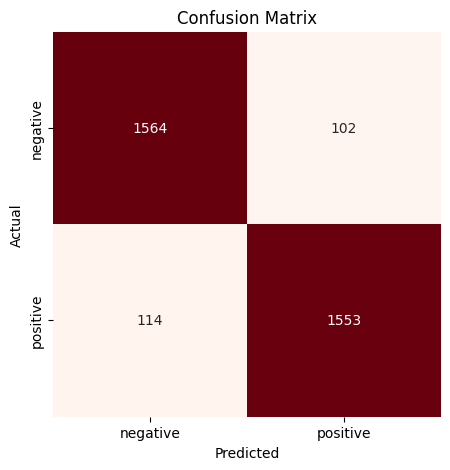

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, xticklabels=label2id.keys(), yticklabels=label2id.keys(), fmt ='d', cbar=False, cmap='Reds')
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.show()

In [31]:
text = "I am super happy today. I got it done. Finally!!"
def get_prediction (text) :
    input_encoded = tokenizer(text, return_tensors='pt').to(device)
    with torch.no_grad():
      outputs = model(**input_encoded)
    logits = outputs. logits
    pred = torch.argmax(logits, dim=1).item()
    return id2label[pred]
get_prediction (text)

'positive'

In [32]:
trainer.save_model("bert-base-uncased-sentiment-model")

In [33]:
from transformers import pipeline
classifier = pipeline('text-classification', model= 'bert-base-uncased-sentiment-model')
classifier([text, 'A very good day indeed', "We loved mth111", "I am feeling anxious"])

Device set to use cuda:0


[{'label': 'positive', 'score': 0.9938284754753113},
 {'label': 'positive', 'score': 0.9844078421592712},
 {'label': 'positive', 'score': 0.9577308297157288},
 {'label': 'positive', 'score': 0.6864750385284424}]

In [40]:
from transformers import pipeline
classifier = pipeline('text-classification', model='bert-base-uncased-sentiment-model')
for i in range(3):
  text = input()
  result = classifier(text)
  print(result)

Device set to use cuda:0


I’m frustrated with this app. It keeps freezing and doesn't work as advertised.
[{'label': 'negative', 'score': 0.9918763637542725}]
This concert was unforgettable! The energy was amazing, and the crowd was so engaged.
[{'label': 'positive', 'score': 0.9983124732971191}]
I am sad today
[{'label': 'positive', 'score': 0.8826801180839539}]


In [ ]:
# Sorry I couldn't implement the streamlit app due to some version incompatibility
# and the time was less so I have shown some outputs here itself in the colab notebook hope You will consider.